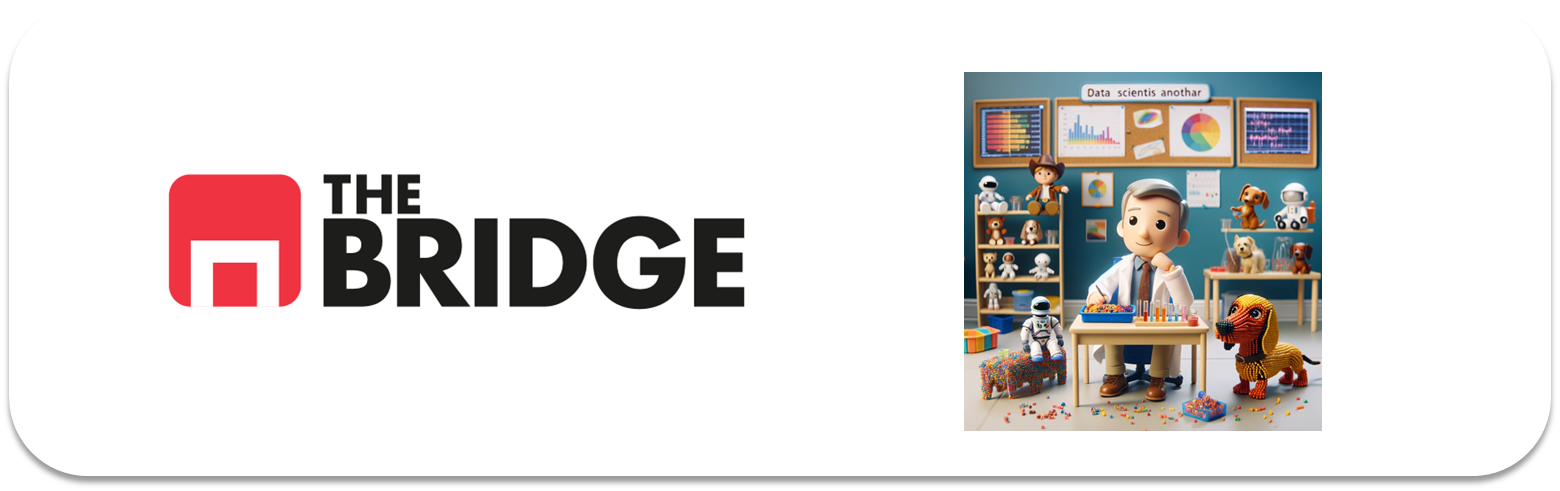

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [98]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
#!python3 sns.get_dataset_names()
#df_titanic = sns.load_dataset('titanic')

##NO ME FUNCIONABA ASI QUE ME HE DESCARGADO EL CSV DESDE INTERNET

In [50]:
df_titanic = pd.read_csv("./titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [51]:
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


    En la que me he descargado de internet si que hay nulos.

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [53]:
# Calculo el porcentaje de valores nulos en cada columna
nulos = (df_titanic.isnull().mean() * 100).round(2)
nulos

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64

Deck tiene tantos nulos que zo la eliminaria pero decido hacer lo siguiente:

In [56]:
# Valores nulos en columnas numéricas los voy a rellenar con la media
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

# Valores nulos en columnas categóricas los voy a rellenar con la moda
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)
df_titanic['deck'].fillna(df_titanic['deck'].mode()[0], inplace=True)


In [ ]:
#Eliminar columna parch
df_titanic.drop(columns=['parch'], inplace=True)

In [57]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|Indica si sobrevivieron| Categórica| 0|||
|pclass|Clase en la que viajaban| Categórica| 1|||
|sex|Indica el género del pasajero| Categórica| 2|||
|age|Indica la edad del pasajero| Numérica| 2|||
|sibsp|Numero de familiares que viajaban con el pasajero| Numérica| 2|||
|fare|Tarifa del viaje| Numérica| 3|||
|embarked|Ciudad desde donde embarcó el pasajero| Categórica| 3|||
|class|Indica la clase en la que viajaban| Categórica| 1|repetida en pclass||
|who|Indica el género del pasajero| Categórica| 1| repetida en sex||
|adult_male|Indica si era hombre adulto| Categórica| 3|||
|deck|No lo tengo claro| Categórica| 3| Tenia muchos nulos||
|embark_town|Ciudad desde donde embarcó el pasajero| Categórica| 3|repetida en embarked||
|alive|Indica si esta vivo| Categórica| 0|||
|alone|Indica si viajaba solo/a| Categórica| 2|redundante con sibsp||

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [58]:
#Estan en la columna de embark_town, las cojo de alli
df_titanic['embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}, inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,Southampton,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [61]:
#Primero vamos a definir cada uno de los tipos, pasando la tabla a lista (para las numéricas seguiré el mismo procedimiento)
categoricas = [
    "survived",
    "pclass",
    "sex",
    "embarked",
    "class",
    "who",
    "adult_male",
    "deck",
    "embark_town",
    "alive",
    "alone"
]


In [59]:
#A continuacion voy a pintar la distribucion de frecuencias

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [65]:
for catego in categoricas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64



Para pclass
pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64



Para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64



Para embarked
embarked
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



Para adult_male
adult_male
True     60.26936
False    39.73064
Name: count, dtype: float64



Para deck
deck
C    83.838384
B     5.274972
D     3.703704
E     3.591470
A     1.683502
F     1.459035
G     0.448934
Name: count, dtype: float64



Para embark_town
embark_town
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



Para alive
alive
no

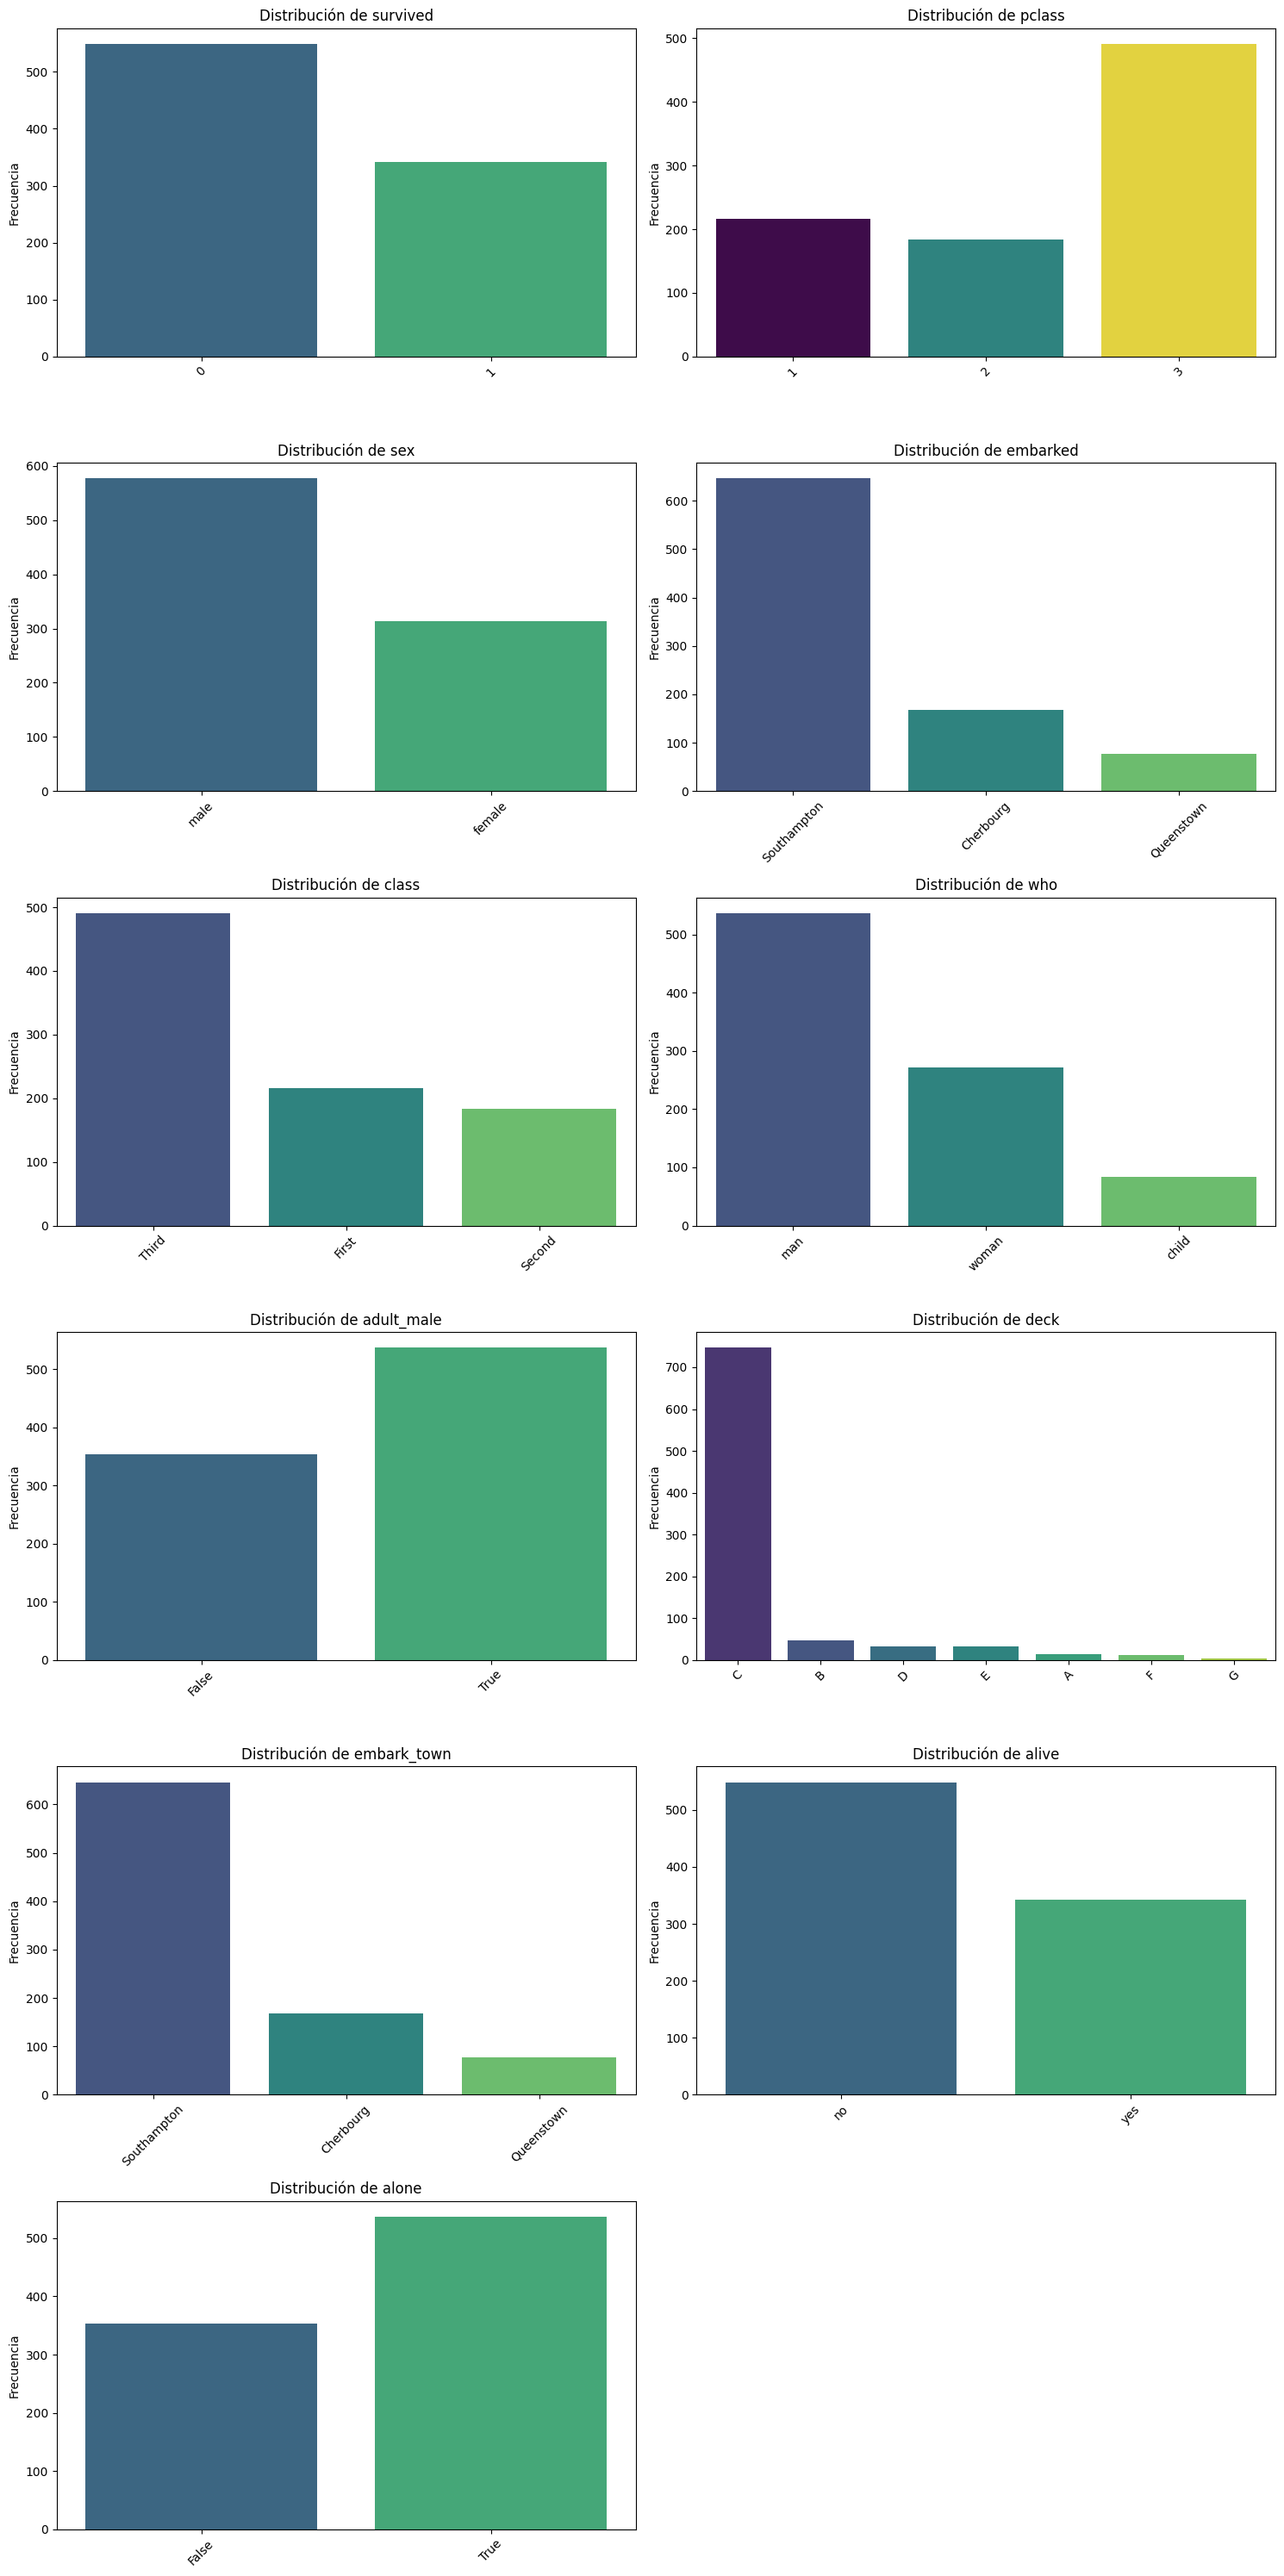

In [62]:
pinta_distribucion_categoricas(df_titanic, categoricas)

Ya de primeras podemos observar que hay mas muertos que vivos, que la mayoria embarcaron en Southhampton, viajaban solos, en tercera clase, y eran en su mayoria hombres.

### #2.2 Numéricas

In [67]:
numericas = [
    "age",
    "sibsp",
    "fare"
]

In [69]:
#Voy a empezar analizando su distribucion y rangos


def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [74]:
#Me voz a centrar en la edad que me parece informativo
df_titanic["age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

Podemos observar que en el Q2 tenemos una edad de 29, muz diferente a la edad maxima, habra posibles outliers (poca gente muy mayor).

In [72]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

get_IQR(df_titanic,"age")

13.0

Es menor que la mediana, igual no hay mucha dispersion.

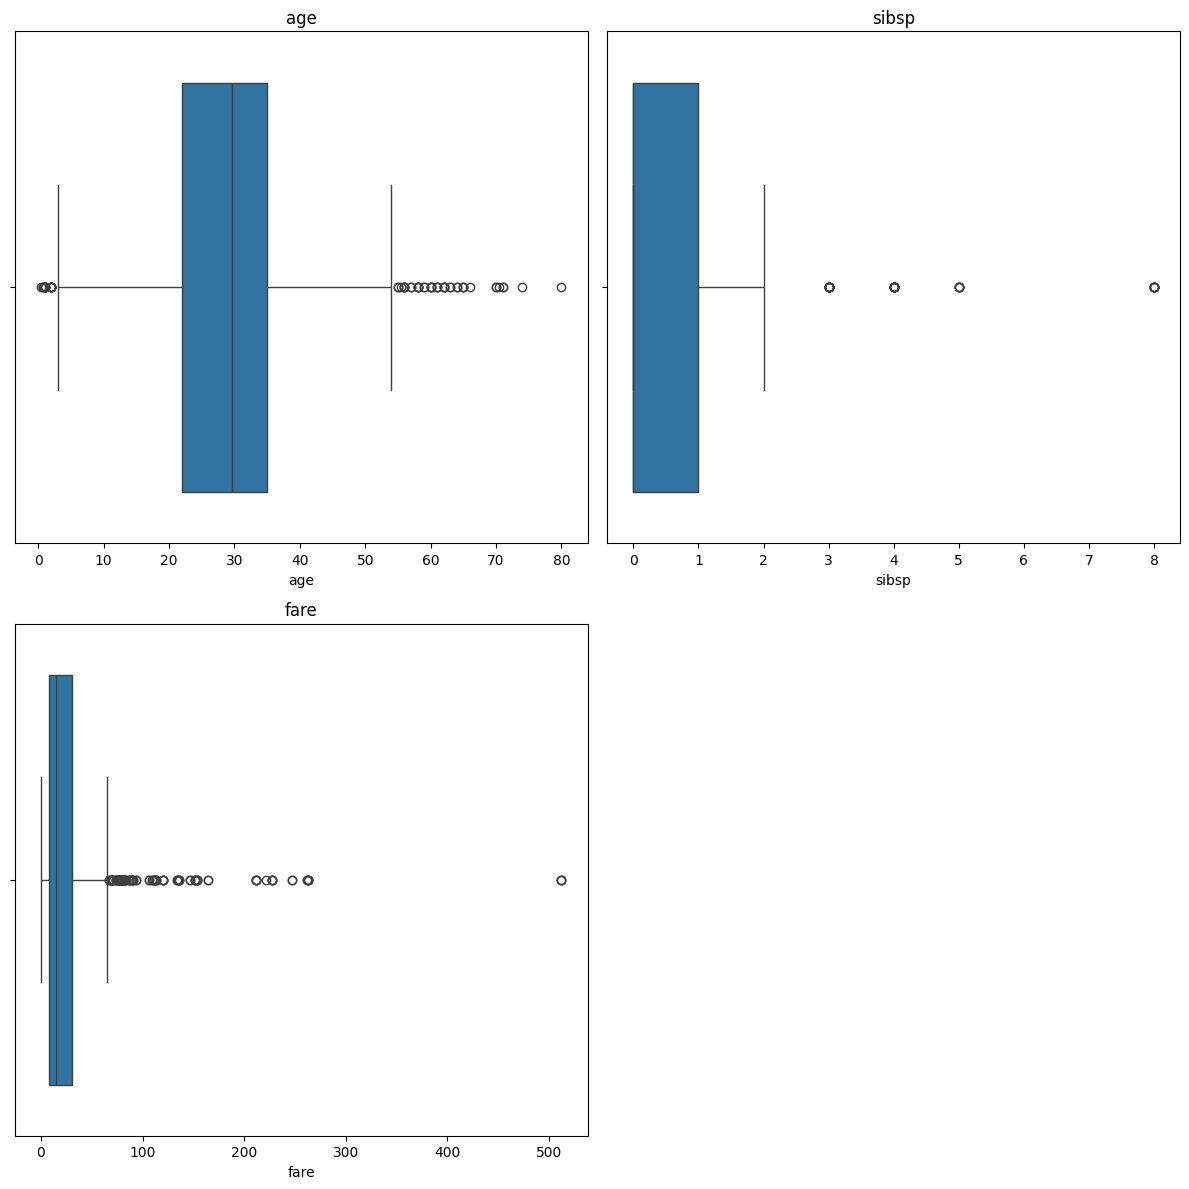

In [75]:
plot_multiple_boxplots(df_titanic, numericas)

Efectivamente habia gente muy mayor de outliers (y unos bebés).

VOY A ANALIZAR DISPERSION:

In [77]:
df_titanic.describe().loc[["std","mean"]].T

,std,mean
survived,0.486592,0.383838
pclass,0.836071,2.308642
age,13.002015,29.699118
sibsp,1.102743,0.523008
fare,49.693429,32.204208


Viendo la media que haz en las edades, esa STD confirma que haz mucha variabilidad (lo podemos ver por el tamaño de los bigotes en el boxplot).

EN CUANTO A DENSIDAD DE DISTRIBUCION:

In [80]:

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


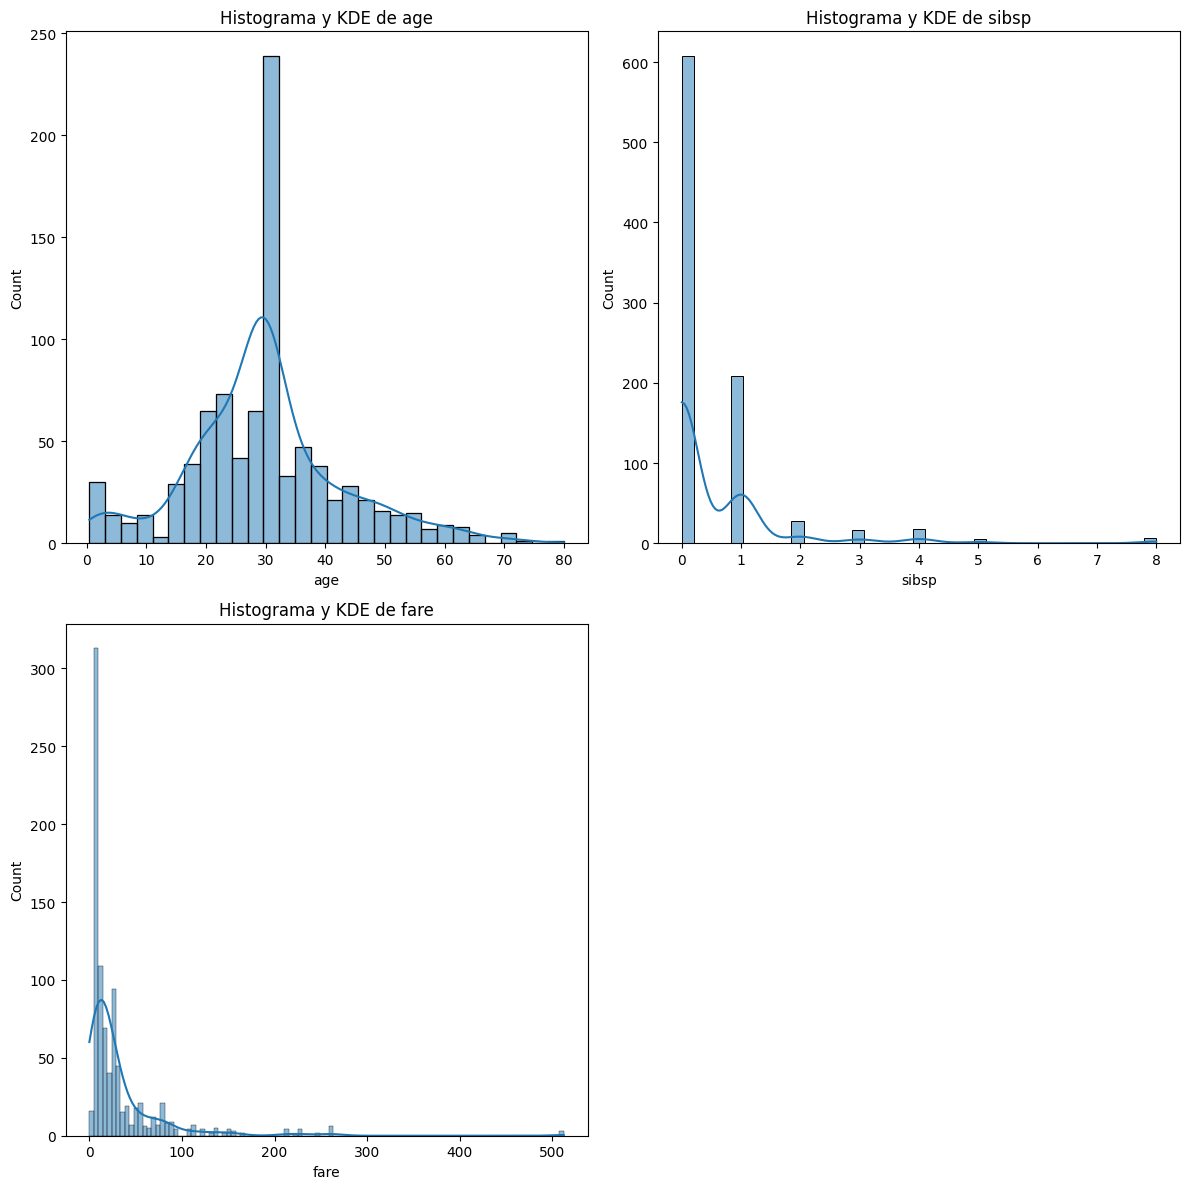

In [81]:
plot_histo_den(df_titanic, numericas)

Observamos que age tiene una distribucion casi normal y que fare tiene una distribucion Log normal.
En cuanto a sibsp es parecido a log normal pero tiene menor numero de datos.

In [83]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

PARA PLOTEARLOS AMBOS JUNTOS, TENIENDO EN CUENTA OUTLIERS CON 4.5:

(3, 2)


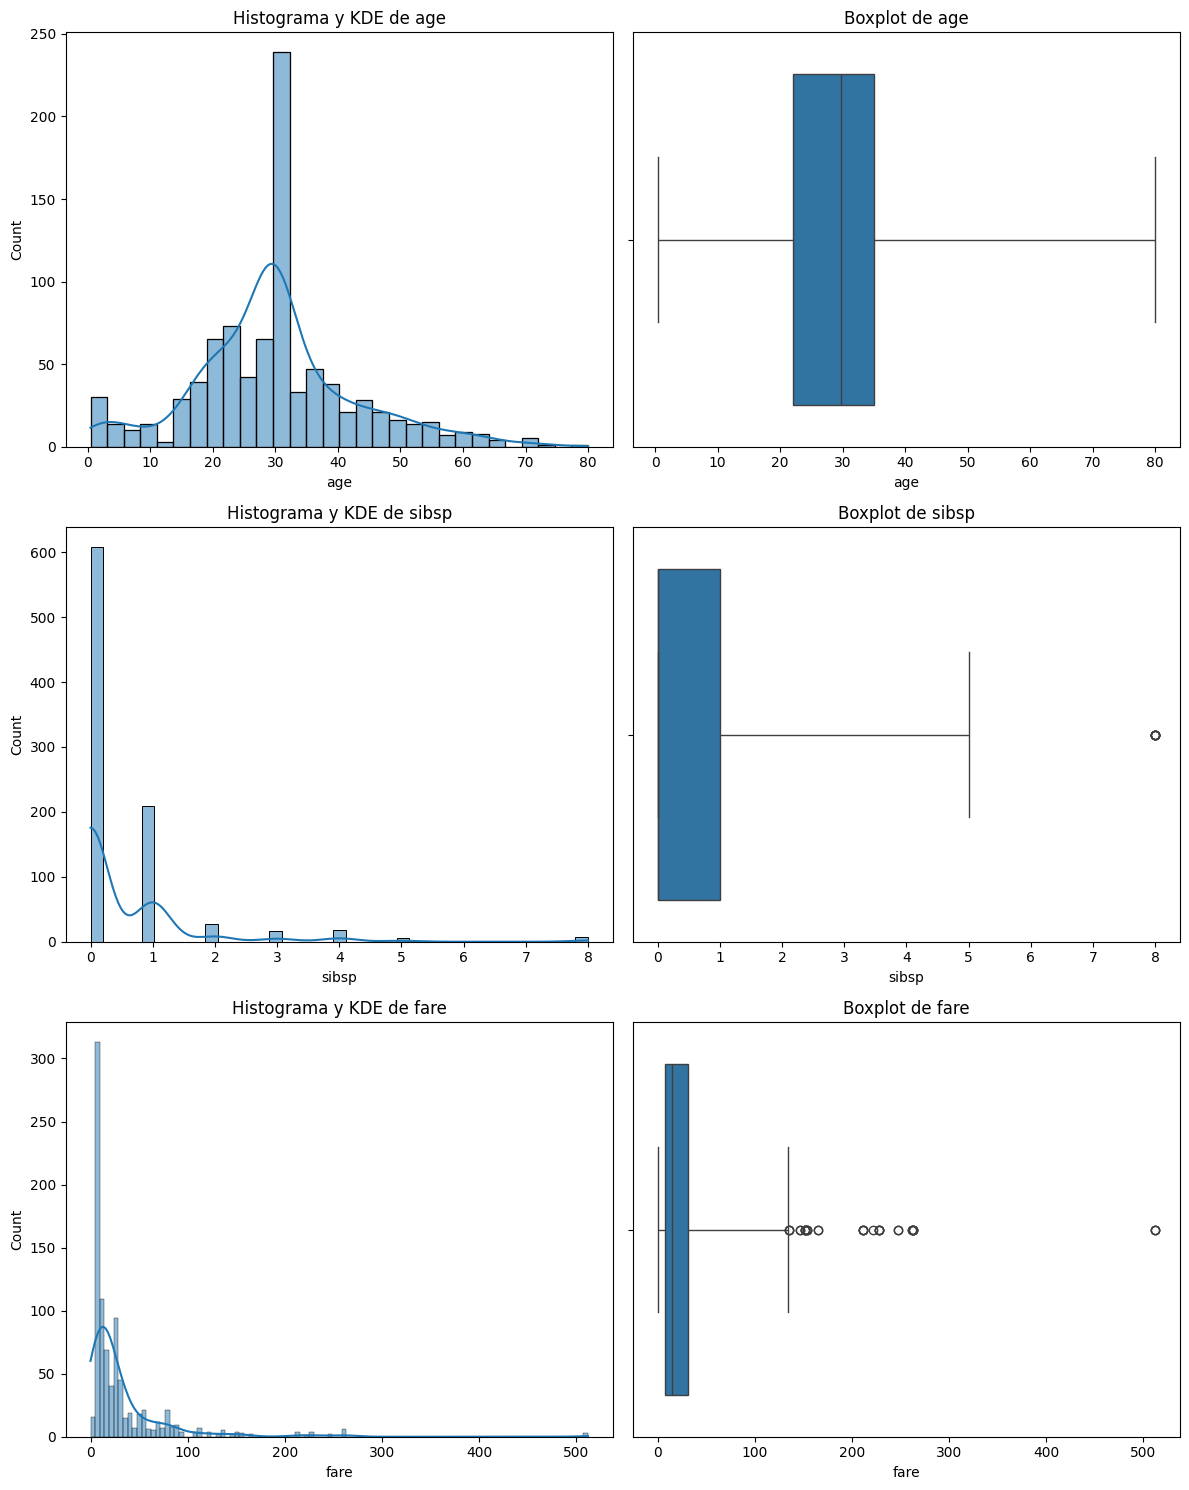

In [89]:
plot_combined_graphs(df_titanic, numericas, whisker_width=4.5)

En resumen:

    - Hay mas muertos que vivos (61 vs 38%)
    - La mayoria embarcaron en Southhampton (aunque no da especial informacion en cuanro a la supervivencia) 
    - Viajaban solos, en tercera clase, y eran en su mayoria hombres.
    - La edad media estaba cerca de los 29 años.
    
Seria muy interesante agrupar por individuos y saber exactamente de los que no sobrevivieron cuales eran hombres, mujeres, edad, etc. De esta forma solo se ven las estadisticas generales. 
